Learned Feature Weights:
Keyword Match: 0.3925
Click-Through Rate: 0.2936
Number of Reviews: 0.1940
Average Rating: 0.0769

Ranked Documents (Highest to Lowest):
Rank 1: Score 0.6462 - Features: [ 0.90535064  0.09444296 90.          3.78694866]
Rank 2: Score 0.4610 - Features: [1.82218257e-02 8.44875311e-01 5.80000000e+01 4.21392372e+00]
Rank 3: Score 0.4215 - Features: [ 0.19579113  0.68300677 34.          3.51577139]
Rank 4: Score 0.3508 - Features: [ 0.100778    0.31897563 68.          3.94028418]
Rank 5: Score 0.1533 - Features: [0.0693613  0.07118865 7.         4.50988805]


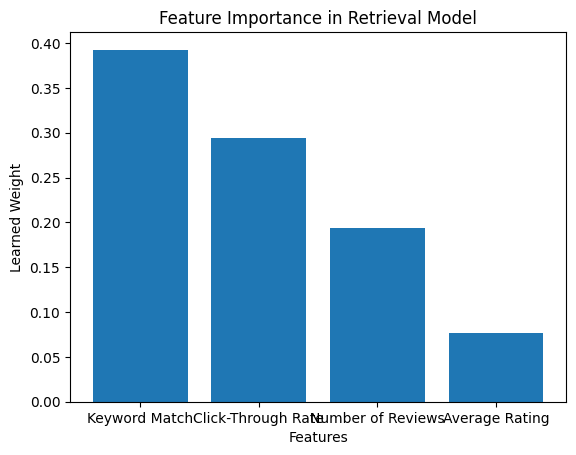

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Generate synthetic document-query dataset
np.random.seed(42)
num_docs = 100  # Number of documents

# Features (simulated)
keyword_match = np.random.rand(num_docs)  # How well keywords match the query
click_through_rate = np.random.rand(num_docs)  # CTR based on past searches
num_reviews = np.random.randint(1, 100, size=num_docs)  # Number of reviews
average_rating = np.random.uniform(1, 5, size=num_docs)  # Average rating out of 5

# True relevance scores (ground truth, simulated for training)
true_relevance = 0.4 * keyword_match + 0.3 * click_through_rate + 0.2 * (num_reviews / 100) + 0.1 * (average_rating / 5)

# Step 2: Train a linear model to learn feature weights
X = np.column_stack((keyword_match, click_through_rate, num_reviews, average_rating))
y = true_relevance  # Target relevance score

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

# Step 3: Display learned feature weights
feature_names = ["Keyword Match", "Click-Through Rate", "Number of Reviews", "Average Rating"]
weights = model.coef_

print("Learned Feature Weights:")
for name, weight in zip(feature_names, weights):
    print(f"{name}: {weight:.4f}")

# Step 4: Rank new documents
new_docs = 5
new_keyword_match = np.random.rand(new_docs)
new_click_through_rate = np.random.rand(new_docs)
new_num_reviews = np.random.randint(1, 100, size=new_docs)
new_average_rating = np.random.uniform(1, 5, size=new_docs)

X_new = np.column_stack((new_keyword_match, new_click_through_rate, new_num_reviews, new_average_rating))
X_new_scaled = scaler.transform(X_new)

predicted_scores = model.predict(X_new_scaled)

# Step 5: Rank documents based on scores
ranked_docs = sorted(zip(predicted_scores, X_new), reverse=True)
print("\nRanked Documents (Highest to Lowest):")
for rank, (score, features) in enumerate(ranked_docs, start=1):
    print(f"Rank {rank}: Score {score:.4f} - Features: {features}")

# Step 6: Plot feature importance
plt.bar(feature_names, weights)
plt.xlabel("Features")
plt.ylabel("Learned Weight")
plt.title("Feature Importance in Retrieval Model")
plt.show()